<a href="https://colab.research.google.com/github/yu-hyeri/Data_analysis/blob/main/APT_Sales_Burden_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# '서울아파트 매매가격지수'와 '주택구입부담지수'의 상관관계 분석 코드입니다.
# 서울 아파트 매매가 변화(2019~2024)로 인해 사람들이 주택구입부담지수가 얼마나 상승 또는 하락했는지 분석했습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
sales = pd.read_csv('/content/drive/MyDrive/개떡찰떡/DATA/monthly_apt_sales.csv')
sales_new = sales.query('지역명 == "서울"')
sales_new_dropped = sales_new.drop(columns=sales.columns[1:8])
sales_new_dropped.to_csv('sales_new_dropped.csv', encoding='utf-8-sig')
pd.set_option('display.max_columns', None) # 모든 열을 표시
pd.set_option('display.max_rows', None) # 모든 행을 표시
sales_new_dropped.to_csv('sales_new_dropped.csv', index=False) #표 저장


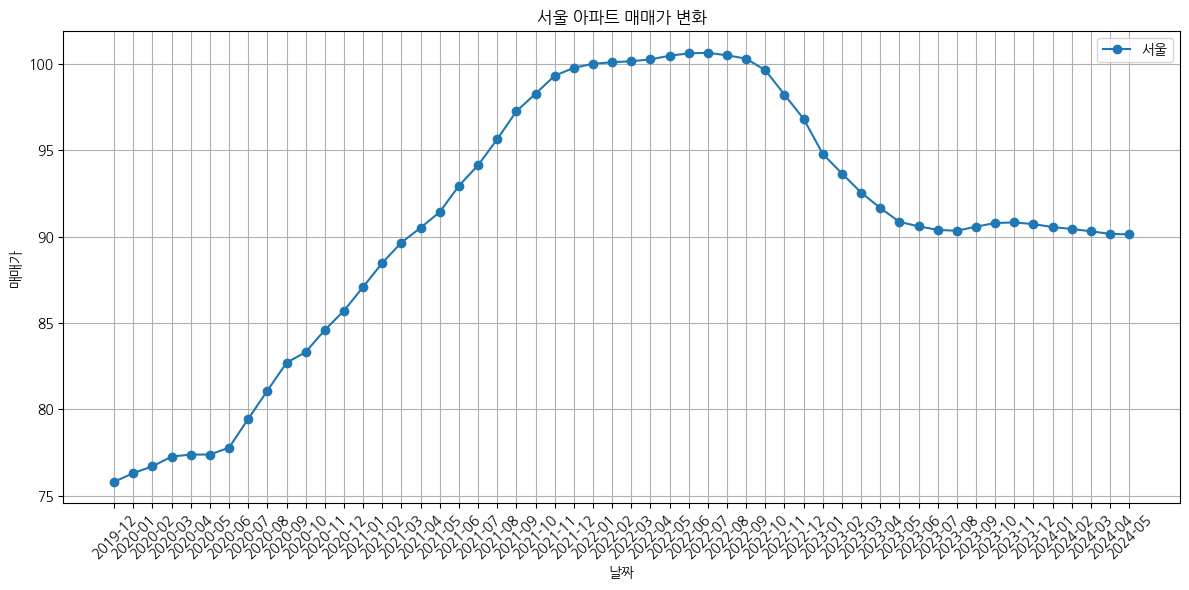

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽어오기
df = pd.read_csv('sales_new_dropped.csv')

# '지역명' 열을 인덱스로 설정
df.set_index('지역명', inplace=True)

# 인덱스를 '서울'로 선택하여 서울 데이터만 가져오기
seoul_data = df.loc['서울']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(df), freq='M')
df.index = date_range.strftime('%Y-%m')

#글꼴 에러 해결 코드 - 1
!apt-get update -qq
!apt-get install -qq fonts-nanum

#글꼴 에러 해결 코드 - 2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# Add font and rebuild cache
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
# Rebuild is automatically triggered when adding a font in current versions

# Set font
plt.rc('font', family='NanumGothic')

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(seoul_data.index, seoul_data, marker='o', label='서울')
plt.title('서울 아파트 매매가 변화')
plt.xlabel('날짜')
plt.ylabel('매매가')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


자료시점     object
서울      float64
dtype: object


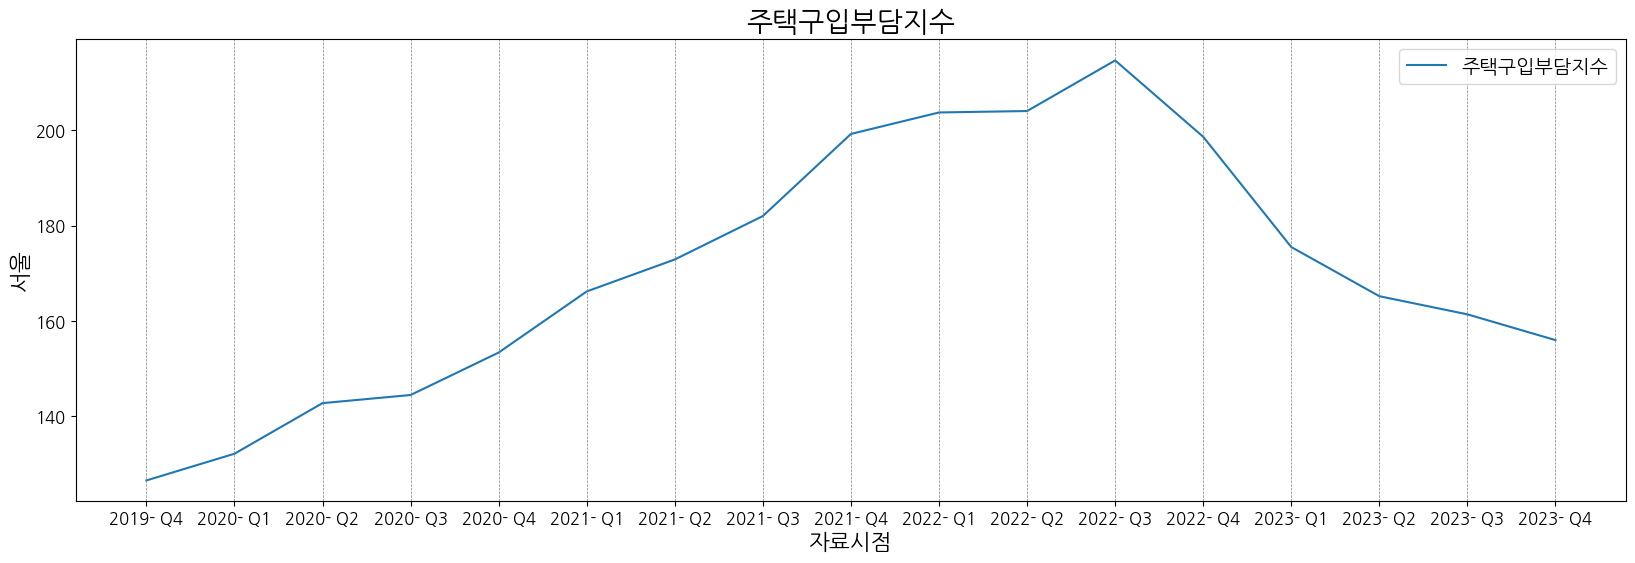

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다. 파일 경로를 수정하세요.
file_path = '/content/drive/MyDrive/개떡찰떡/윤지혁/k_hai.csv'
hai = pd.read_csv(file_path)

# 데이터 프레임의 자료형을 확인합니다.
print(hai.dtypes)

# '자료시점' 열을 문자열로 변환합니다. (필요한 경우 날짜 형식으로 변환할 수도 있습니다)
hai['자료시점'] = hai['자료시점'].astype(str)

# '자료시점' 열에서 '분기'를 'Q'로, '년'을 ' '로 대체합니다.
hai['자료시점'] = hai['자료시점'].str.replace('분기', 'Q').str.replace('년', '-')

# 분기 형식을 '<1Q', '2Q', '3Q' 형식으로 변경
hai['자료시점'] = hai['자료시점'].str.replace('1Q', 'Q1').str.replace('2Q', 'Q2').str.replace('3Q', 'Q3').str.replace('4Q', 'Q4')

# 그래프를 그립니다.
plt.figure(figsize=(20, 6))
plt.plot(hai['자료시점'], hai['서울'], label='주택구입부담지수')

# 그래프에 제목과 축 레이블을 추가합니다.
plt.title('주택구입부담지수', fontsize=20)
plt.xlabel('자료시점', fontsize=16)
plt.ylabel('서울', fontsize=16)
plt.legend(fontsize=14)

# '자료시점' 열에서 분기 위치를 찾아 세로선을 그립니다.
for i in range(len(hai)):
    if 'Q' in hai['자료시점'][i]:
        plt.axvline(x=hai['자료시점'][i], color='gray', linestyle='--', linewidth=0.5)

# x축 눈금 레이블 크기를 키웁니다.
plt.xticks(fontsize=12)

# y축 눈금 레이블 크기를 키웁니다.
plt.yticks(fontsize=12)

# 그래프를 보여줍니다.
plt.show()


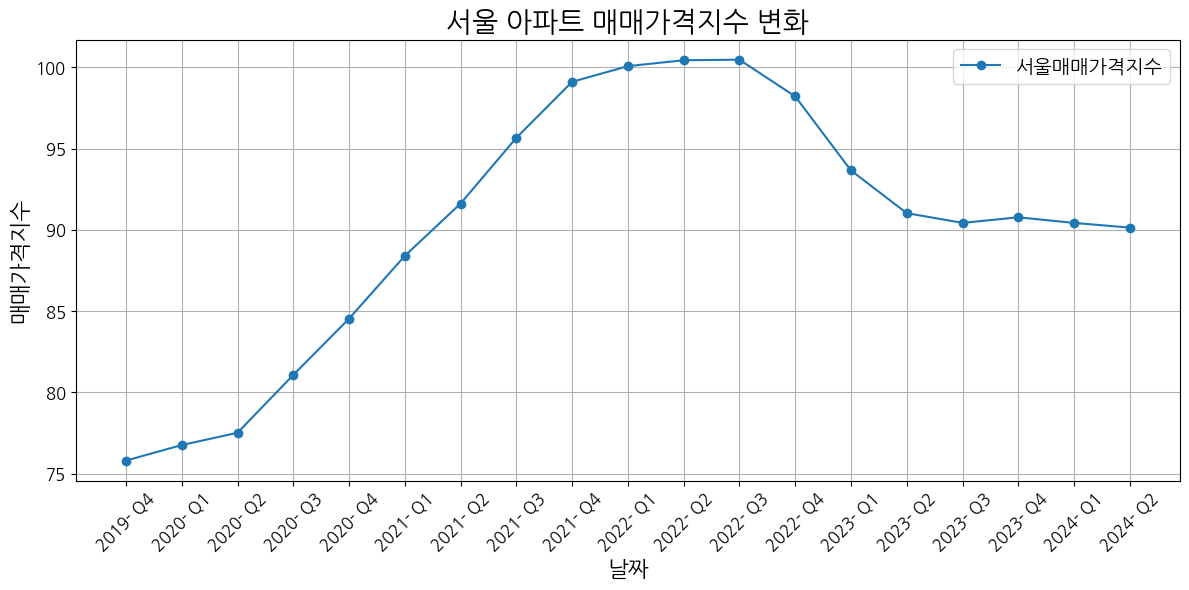

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일을 읽어옵니다. 파일 경로를 수정하세요.
file_path = '/content/drive/MyDrive/개떡찰떡/DATA/monthly_apt_sales.csv'
sales = pd.read_csv(file_path)

# '서울' 데이터만 선택합니다.
sales_new = sales.query('지역명 == "서울"')

# 불필요한 열 제거
sales_new_dropped = sales_new.drop(columns=sales.columns[1:8])

# 'sales_new_dropped.csv' 파일로 저장
output_file = '/content/sales_new_dropped.csv'
sales_new_dropped.to_csv(output_file, encoding='utf-8-sig', index=False)

# 'sales_new_dropped.csv' 파일에서 데이터 읽어오기
df = pd.read_csv(output_file)

# '지역명' 열을 인덱스로 설정
df.set_index('지역명', inplace=True)

# 인덱스를 '서울'로 선택하여 서울 데이터만 가져오기
seoul_data = df.loc['서울']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(seoul_data), freq='M')
seoul_data.index = date_range

# 월별 데이터를 분기별로 집계
seoul_data_quarterly = seoul_data.resample('Q').mean()

# 분기별 인덱스를 'YYYY-Q' 형식으로 변환
seoul_data_quarterly.index = seoul_data_quarterly.index.to_period('Q').strftime('%Y- Q%q')

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(seoul_data_quarterly.index, seoul_data_quarterly, marker='o', label='서울매매가격지수')
plt.title('서울 아파트 매매가격지수 변화', fontsize=20)
plt.xlabel('날짜', fontsize=16)
plt.ylabel('매매가격지수', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()


자료시점     object
서울      float64
dtype: object


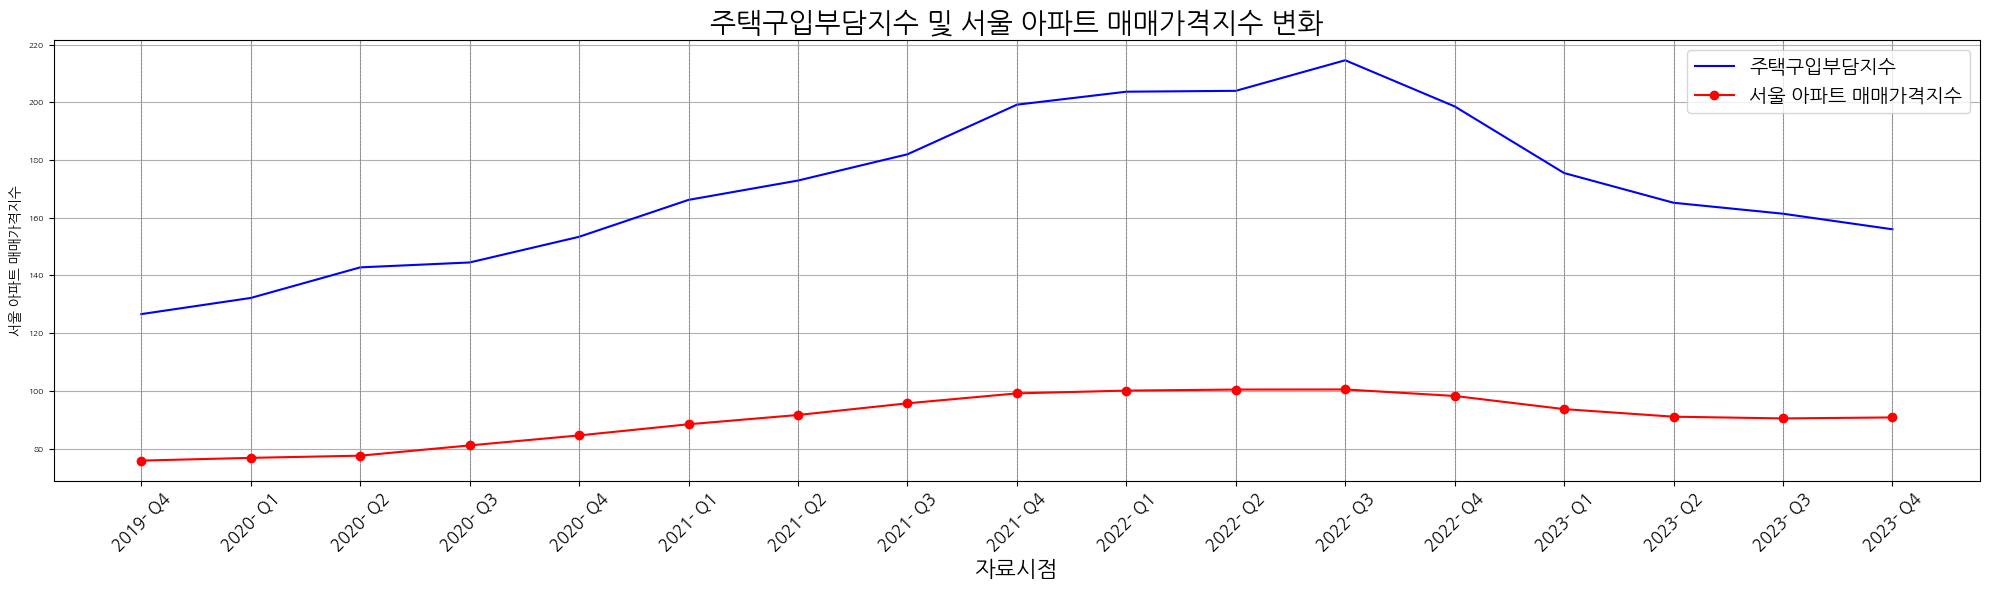

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 첫 번째 데이터셋 (주택구입부담지수 데이터)
file_path_hai = '/content/drive/MyDrive/개떡찰떡/윤지혁/k_hai.csv'
hai = pd.read_csv(file_path_hai)

# 마지막 행 삭제
hai = hai.drop(hai.index[-1])

# 데이터 프레임의 자료형을 확인합니다.
print(hai.dtypes)

# '자료시점' 열을 문자열로 변환합니다. (필요한 경우 날짜 형식으로 변환할 수도 있습니다)
hai['자료시점'] = hai['자료시점'].astype(str)

# '자료시점' 열에서 '분기'를 'Q'로, '년'을 ' '로 대체합니다.
hai['자료시점'] = hai['자료시점'].str.replace('분기', 'Q').str.replace('년', '-')

# 분기 형식을 '<1Q', '2Q', '3Q' 형식으로 변경
hai['자료시점'] = hai['자료시점'].str.replace('1Q', 'Q1').str.replace('2Q', 'Q2').str.replace('3Q', 'Q3').str.replace('4Q', 'Q4')

# 첫 번째 그래프: 주택구입부담지수 그리기
plt.figure(figsize=(20, 6))
plt.plot(hai['자료시점'], hai['서울'], label='주택구입부담지수', color='b')

# 첫 번째 그래프에 제목과 축 레이블 추가
plt.title('주택구입부담지수 및 서울 아파트 매매가격지수 변화', fontsize=20)
plt.xlabel('자료시점', fontsize=16)
plt.ylabel('주택구입부담지수', fontsize=16)
plt.legend(fontsize=14)

# '자료시점' 열에서 분기 위치를 찾아 세로선을 그립니다.
for i in range(len(hai)):
    if 'Q' in hai['자료시점'][i]:
        plt.axvline(x=hai['자료시점'][i], color='gray', linestyle='--', linewidth=0.5)

# 두 번째 데이터셋 (서울 아파트 매매가격지수 데이터)
file_path_sales = '/content/sales_new_dropped.csv'
df_sales = pd.read_csv(file_path_sales)

df_sales = df_sales.drop(df_sales.columns[-5:], axis=1)

# '지역명' 열을 인덱스로 설정하고 '서울' 데이터만 선택합니다.
df_sales.set_index('지역명', inplace=True)
seoul_data = df_sales.loc['서울']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(seoul_data), freq='M')
seoul_data.index = date_range

# 월별 데이터를 분기별로 집계
seoul_data_quarterly = seoul_data.resample('Q').mean()

# 분기별 인덱스를 'YYYY-Q' 형식으로 변환
seoul_data_quarterly.index = seoul_data_quarterly.index.to_period('Q').strftime('%Y- Q%q')

# 두 번째 그래프: 서울 아파트 매매가격지수 그리기
plt.plot(seoul_data_quarterly.index, seoul_data_quarterly, marker='o', label='서울 아파트 매매가격지수', color='r')

# 두 번째 그래프에 축 레이블 추가
plt.ylabel('서울 아파트 매매가격지수', fontsize=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=6)
plt.grid(True)
plt.legend(fontsize=14)

# 그래프 보여주기
plt.tight_layout()
plt.show()


자료시점     object
서울      float64
dtype: object


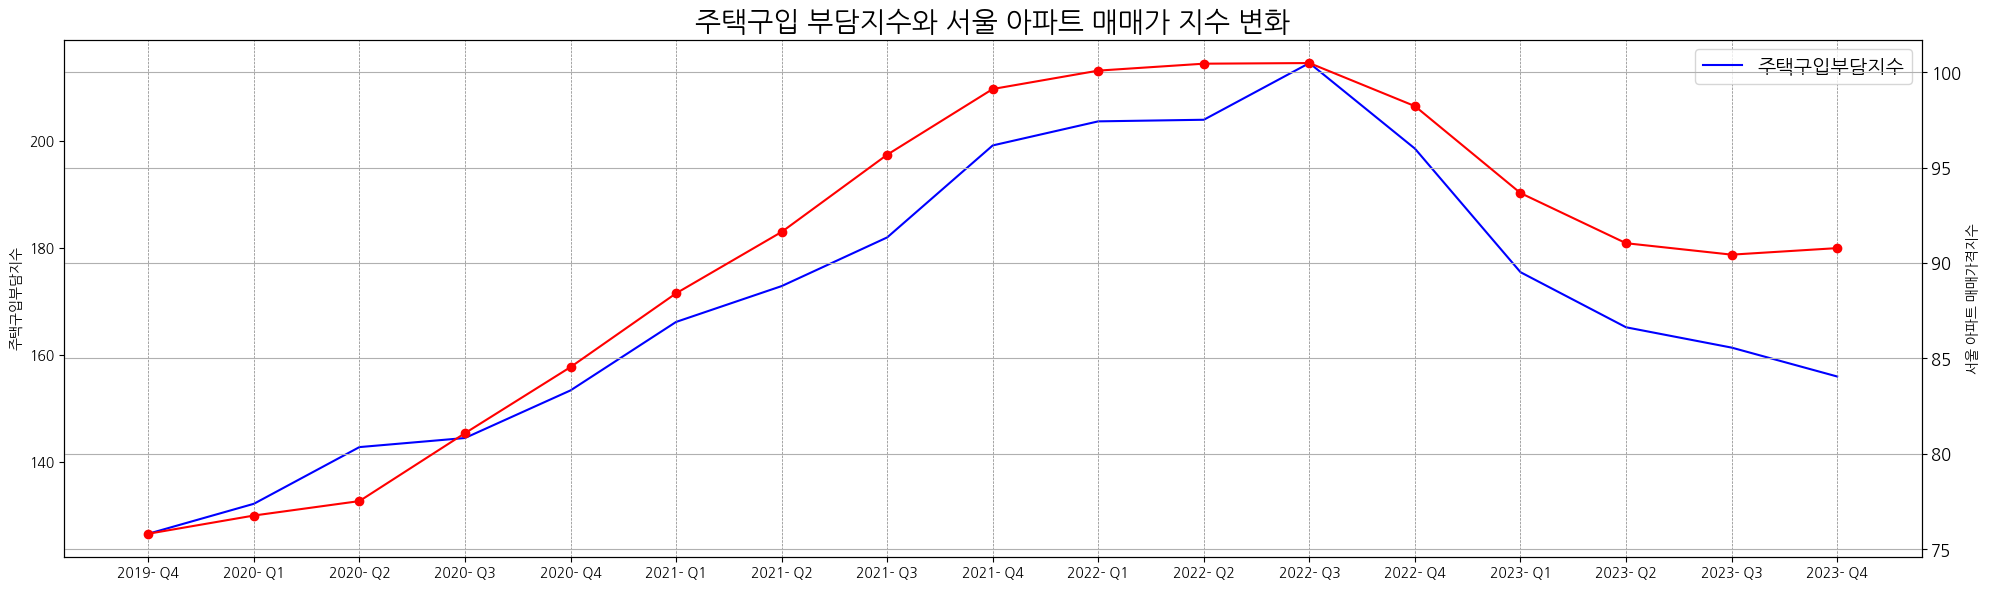

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 첫 번째 데이터셋 (주택구입부담지수 데이터)
file_path_hai = '/content/drive/MyDrive/개떡찰떡/윤지혁/k_hai.csv'
hai = pd.read_csv(file_path_hai)

# 마지막 행 삭제
hai = hai.drop(hai.index[-1])

# 데이터 프레임의 자료형을 확인합니다.
print(hai.dtypes)

# '자료시점' 열을 문자열로 변환합니다. (필요한 경우 날짜 형식으로 변환할 수도 있습니다)
hai['자료시점'] = hai['자료시점'].astype(str)

# '자료시점' 열에서 '분기'를 'Q'로, '년'을 ' '로 대체합니다.
hai['자료시점'] = hai['자료시점'].str.replace('분기', 'Q').str.replace('년', '-')

# 분기 형식을 '<1Q', '2Q', '3Q' 형식으로 변경
hai['자료시점'] = hai['자료시점'].str.replace('1Q', 'Q1').str.replace('2Q', 'Q2').str.replace('3Q', 'Q3').str.replace('4Q', 'Q4')

# 첫 번째 그래프: 주택구입부담지수 그리기
plt.figure(figsize=(20, 6))
plt.plot(hai['자료시점'], hai['서울'], label='주택구입부담지수', color='b')

# 첫 번째 그래프에 제목과 축 레이블 추가
plt.title('주택구입 부담지수와 서울 아파트 매매가 지수 변화', fontsize=20)
plt.xlabel('', fontsize=10)
plt.ylabel('주택구입부담지수', fontsize=10)
plt.legend(fontsize=14)

# '자료시점' 열에서 분기 위치를 찾아 세로선을 그립니다.
for i in range(len(hai)):
    if 'Q' in hai['자료시점'][i]:
        plt.axvline(x=hai['자료시점'][i], color='gray', linestyle='--', linewidth=0.5)

# 두 번째 데이터셋 (서울 아파트 매매가격지수 데이터)
file_path_sales = '/content/sales_new_dropped.csv'
df_sales = pd.read_csv(file_path_sales)

df_sales = df_sales.drop(df_sales.columns[-5:], axis=1)

# '지역명' 열을 인덱스로 설정하고 '서울' 데이터만 선택합니다.
df_sales.set_index('지역명', inplace=True)
seoul_data = df_sales.loc['서울']

# 인덱스를 날짜 형식으로 변환
date_range = pd.date_range(start='2019-12-01', periods=len(seoul_data), freq='M')
seoul_data.index = date_range

# 월별 데이터를 분기별로 집계
seoul_data_quarterly = seoul_data.resample('Q').mean()

# 분기별 인덱스를 'YYYY-Q' 형식으로 변환
seoul_data_quarterly.index = seoul_data_quarterly.index.to_period('Q').strftime('%Y- Q%q')

# 두 번째 그래프: 서울 아파트 매매가격지수 그리기
ax2 = plt.twinx()
ax2.plot(seoul_data_quarterly.index, seoul_data_quarterly, marker='o', label='서울 아파트 매매가격지수', color='r')

# 두 번째 그래프에 축 레이블 추가
ax2.set_ylabel('서울 아파트 매매가격지수', fontsize=10)
ax2.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# 그래프 보여주기
plt.tight_layout()
plt.show()
